# Límites

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sympy import symbols, diff, Plane, Point3D, cos, sin, Eq, Line, Point, exp
from sympy.utilities.lambdify import lambdify
from matplotlib import cm
from mpl_toolkits import mplot3d

import matplotlib as mpl

In [2]:
plt.rcParams['figure.figsize'] = 12, 6

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [3]:
def plot_limit(f, limit, p, epsilon, str_f = None, n=10000, r=5):
    x0, y0 = p
    xlim = [x0 - r, x0 + r]
    ylim = [y0 - r, y0 + r]
    x = np.random.uniform(xlim[0], xlim[1], n)
    y = np.random.uniform(ylim[0], ylim[1], n)
    output = np.abs(f(x, y) - limit)
    color = np.where(output >= epsilon, '#4DC0E5', '#FF7B4A')
    plt.scatter(x, y, c=color, s=1)
    plt.scatter(x0, y0, c='k', s=80, marker='*')
    if str_f is None:
        plt.title(f'$p = ({str(x0)}, {str(y0)})$, $\epsilon = {str(epsilon)}$ y limite {str(limit)}', fontsize=15)
    else:
        plt.title(f'$f = {str_f}$,   $p = ({str(x0)}, {str(y0)})$, $\epsilon = {str(epsilon)}$ y limite {str(limit)}',
                  fontsize=15)
        

In [4]:
def plot_surface(f, n=300, lims=5):
    X = np.linspace(-lims, lims, n)
    Y = np.linspace(-lims, lims, n)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    return fig, ax, surf

In [5]:
x, y, t = symbols('x y t')

## Ejemplo 1

Comencemos con nuestro ejemplo favorito, $f(x, y) = x^2 + y^2$. Recordemos cómo es su gráfica:

In [6]:
f = x*x + y*y

In [7]:
f_ = lambdify((x, y), f)

(<Figure size 864x432 with 1 Axes>,
 <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fee919737b8>)

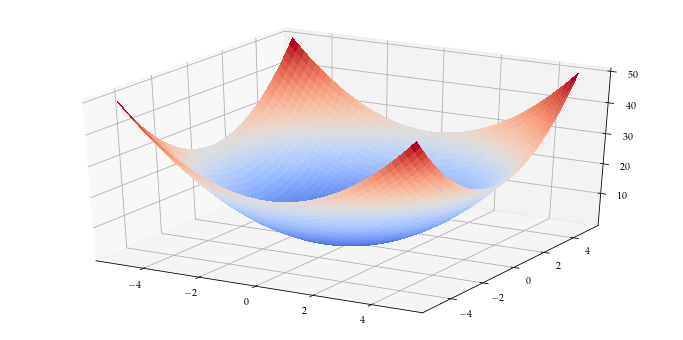

In [8]:
plot_surface(f_)

Sabemos que esta función es continua en todo punto de $\mathbb{R}^2$. Esto implica que,

$$\lim_{(x, y) \to (x_0, y_0)} x^2 + y^2 = x_0^2 + y_0^2, $$
es decir, para calcular el límite, evaluamos la función en el punto $(x_0, y_0)$.

Si recordamos la definición $\epsilon - \delta$ de límite, sabemos que para cualquier $\epsilon > 0$, podemos encontrar un $\delta > 0$ tal que 

$$ \lvert x^2 + y^2 - x_0^2 - y_0^2 \lvert < \epsilon \text{     si     } \lVert (x, y) - (x_0, y_0) \lVert < \delta. $$

Lo anterior quiere decir, que yo puedo formar un disco de radio $\delta$ y centrado en el punto $(x_0, y_0)$ tal que todos los puntos en el disco satisfacen la desigualdad $\lvert x^2 + y^2 - x_0^2 - y_0^2 \lvert < \epsilon$. 

Veamos esto con un ejemplo. Consideremos el punto $(0, 0)$. Por continuidad de $f$ sabemos que 

$$\lim_{(x, y) \to (0,0)} x^2 + y^2 = 0.$$

Entonces, para cualquier $\epsilon > 0$ que demos, deberíamos encontrar un disco alrededor de $(0,0)$ que satisface 

$$\lvert x^2 + y^2 \lvert < \epsilon $$

Por ejemplo, para $\epsilon = 5$, el dominio luce de esta manera.

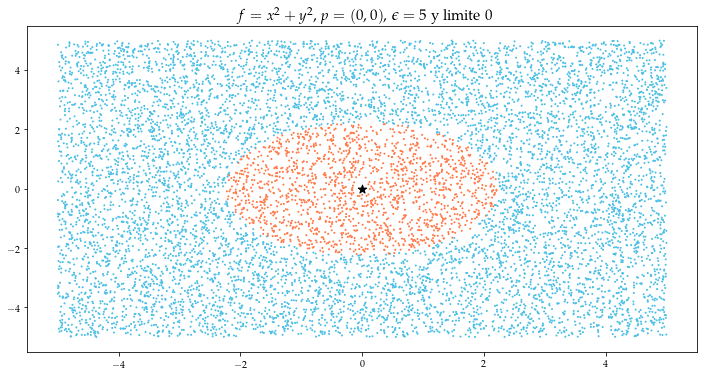

In [9]:
plot_limit(f = f_, limit=0, p=(0,0), epsilon=5, str_f='x^2 + y^2')

Como podemos observar gráficamente, podemos crear un disco alrededor del punto, que satisfaga la desigualdad. 

Si cambiamos el $\epsilon$, esto comoquiera se debería de satisfacer. Por ejemplo, para $\epsilon = 1$, tenemos

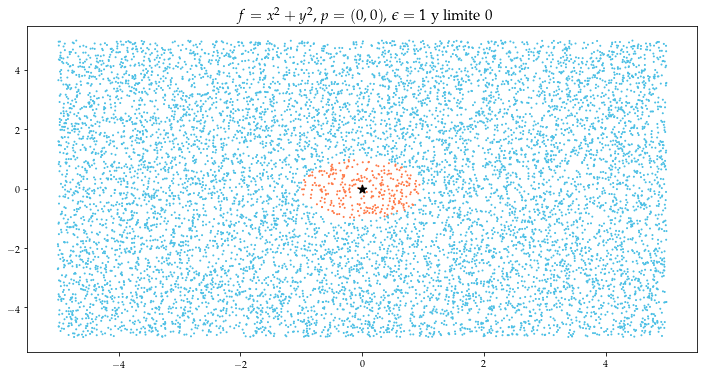

In [10]:
plot_limit(f = f_, limit=0, p=(0,0), epsilon=1, str_f='x^2 + y^2')

Para $\epsilon = 0.5$

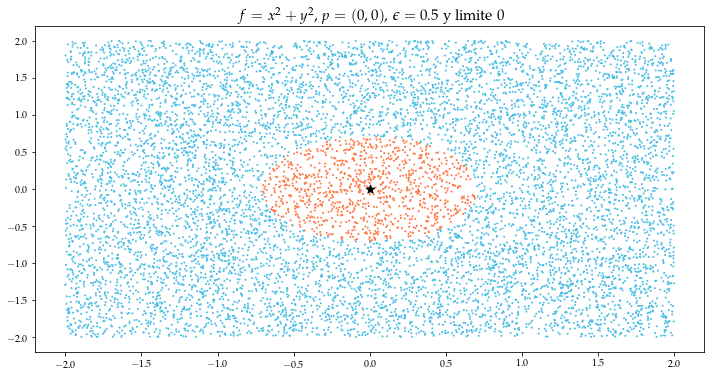

In [11]:
plot_limit(f = f_, limit=0, p=(0,0), epsilon=0.5, str_f='x^2 + y^2', r=2)

## Ejemplo 2

Consideremos ahora la función $f(x, y) = \frac{\sin(xy)}{xy}$. Veamos como luce su gráfica,

In [12]:
g = sin(x*y) / (x*y)
g_ = lambdify((x, y), g)
g

sin(x*y)/(x*y)

(<Figure size 864x432 with 1 Axes>,
 <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fee92b77d68>)

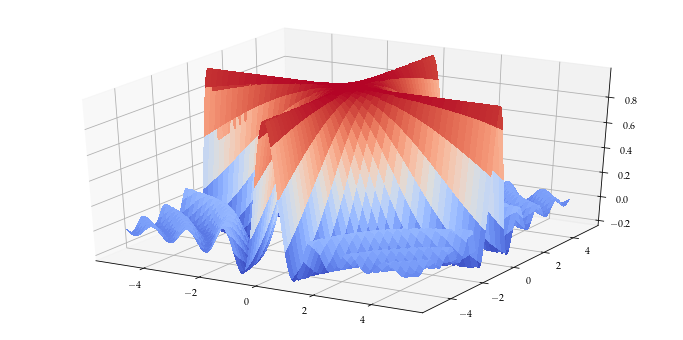

In [13]:
plot_surface(g_)

Apesar de su comportamiento irregular, en clase demostramos que 
$$ \lim_{(x, y) \to (0, 0)}  \frac{\sin(xy)}{xy}  = 1 $$

Entonces, para cualquier $\epsilon > 0$, podemos encontrar un $\delta > 0$ tal que 
$$ \lvert \frac{\sin(xy)}{xy}  -  1 \lvert < \epsilon \text{ si } \lVert (x, y) \lVert < \delta.$$

Comprobemos esto, para $\epsilon=1$

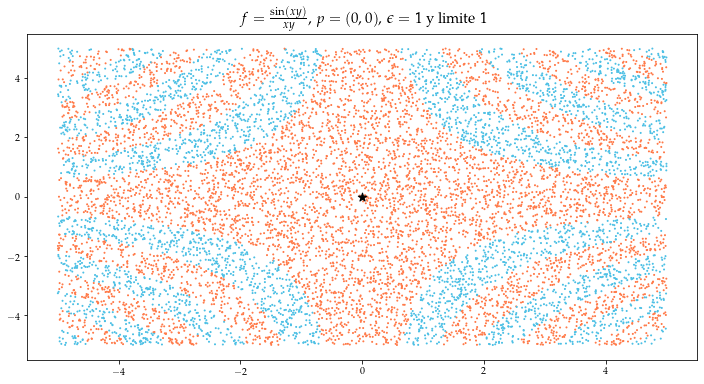

In [14]:
plot_limit(g_, 1, (0,0), 1, str_f='\\frac{\sin(xy)}{xy}')

Para $\epsilon = 0.1$

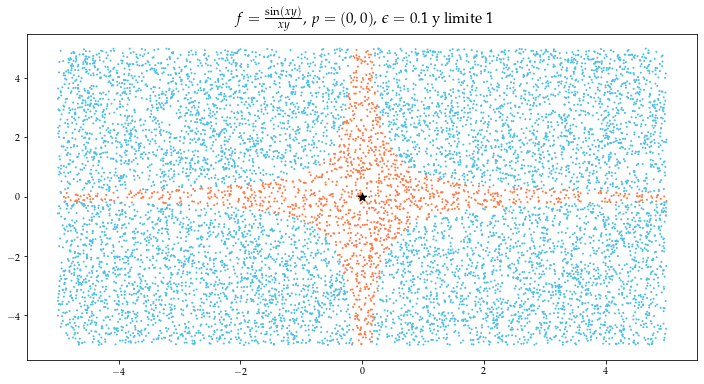

In [15]:
plot_limit(g_, 1, (0,0), 0.1, str_f='\\frac{\sin(xy)}{xy}')

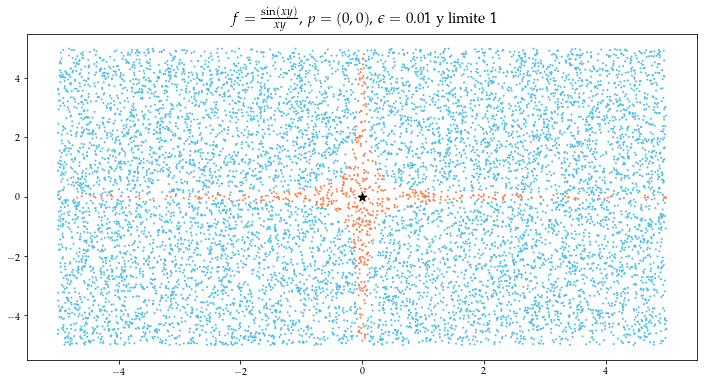

In [16]:
plot_limit(g_, 1, (0,0), 0.01, str_f='\\frac{\sin(xy)}{xy}')

##  Ejemplo 3

Consideremos ahora, la función $\frac{(x- y)^2}{x^2 + y^2}$. Su gráfica luce como sigue

In [17]:
h = (x - y) * (x - y) / (x*x + y*y)
h_ = lambdify((x, y), h)
h

(x - y)**2/(x**2 + y**2)

(<Figure size 864x432 with 1 Axes>,
 <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fee9330f128>)

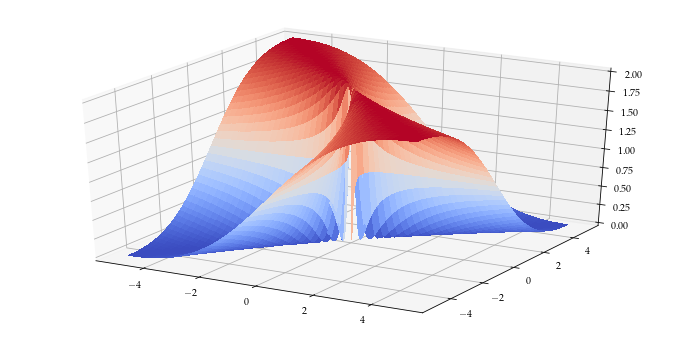

In [18]:
plot_surface(h_)

En clase, demostramos que el 
$$\lim_{(x, y) \to (0,0)}  \frac{(x- y)^2}{x^2 + y^2} $$
no existe.

Esto quiere decir que, para todo $L \in \mathbb{R}$,  existe un $\epsilon > 0$ tal que para todo $\delta > 0$
$$ \lvert \frac{(x- y)^2}{x^2 + y^2} - L \lvert \geq \epsilon \text{ para algún } (x, y) \text{ tal que}  \lVert (x, y) \lVert < \delta. $$



Tratemos de entender lo anterior con un ejemplo. Supongamos que $\lim_{(x, y) \to (0,0)}  \frac{(x- y)^2}{x^2 + y^2} = 0$ y sea $\epsilon = 1$. 

Entonces, podemos hacer lo siguiente 

$$ \lvert \frac{(x- y)^2}{x^2 + y^2} \lvert \leq 1, $$
si y solo si,
$$ -1 < \frac{(x- y)^2}{x^2 + y^2} < 1, $$
si y solo si,
$$ -(x^2 + y^2) < (x- y)^2  < x^2 + y^2, $$
si y solo si,
$$ -(x^2 + y^2) < x^2 - 2xy + y^2 < x^2 + y^2, $$
si y solo si,
$$ -2(x^2 + y^2) < - 2xy < 0. $$

Resolviendo la primera desigualdad, vemos que $(x-y)^2 + x^2 + y^2 > 0$; y esto se cumple si $x\neq 0$ y $y \neq 0$.

La segunda desigualdad implica que $2xy > 0$. Esto se cumple si $x > 0$ y $y > 0$ o $x<0$ y $y < 0$. Vemos que esto se cumple si realizamos la gráfica:

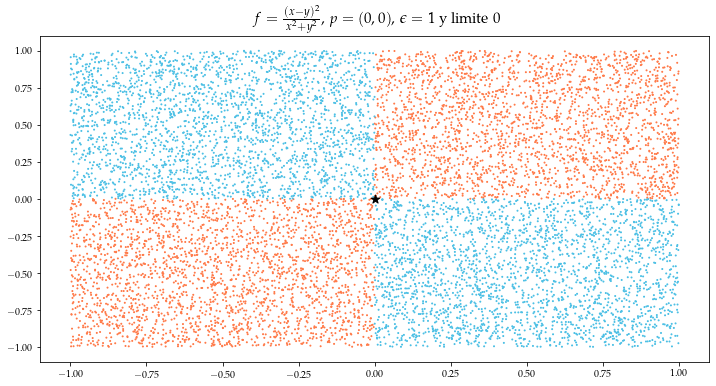

In [19]:
plot_limit(h_, 0, (0,0), 1, str_f='\\frac{(x-y)^2}{x^2 + y^2}', r=1)

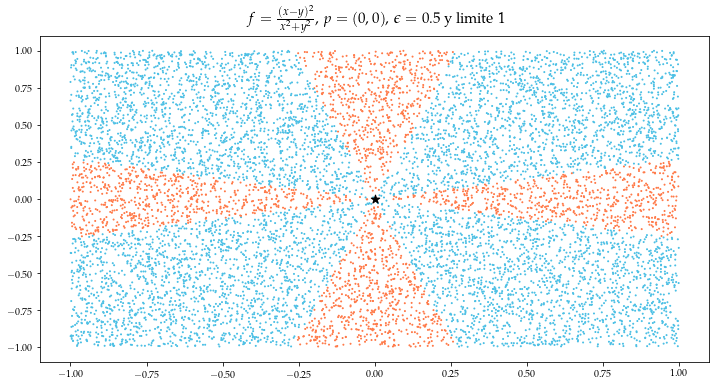

In [20]:
plot_limit(h_, 1, (0,0), 0.5, str_f='\\frac{(x-y)^2}{x^2 + y^2}', r=1)

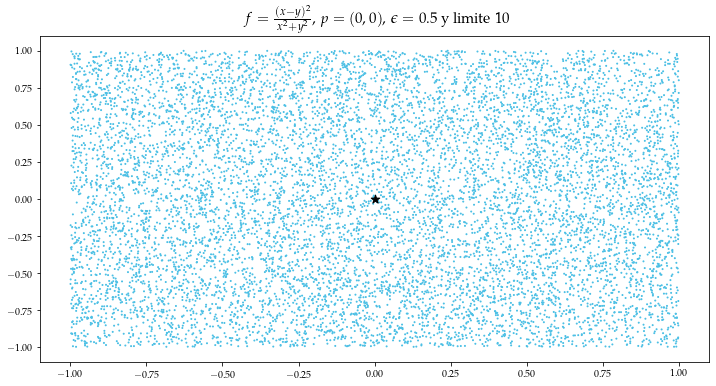

In [21]:
plot_limit(h_, 10, (0,0), 0.5, str_f='\\frac{(x-y)^2}{x^2 + y^2}', r=1)

### Ejemplo 4

In [22]:
k = sin(x*y) / (x*x + y*y)
k_ = lambdify((x, y), k)
k

sin(x*y)/(x**2 + y**2)

(<Figure size 864x432 with 1 Axes>,
 <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fee935379b0>)

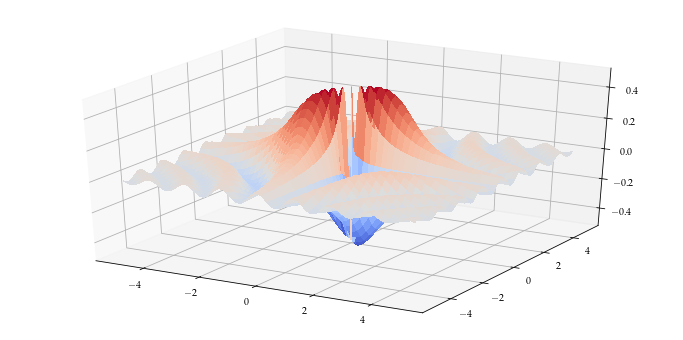

In [23]:
plot_surface(k_)

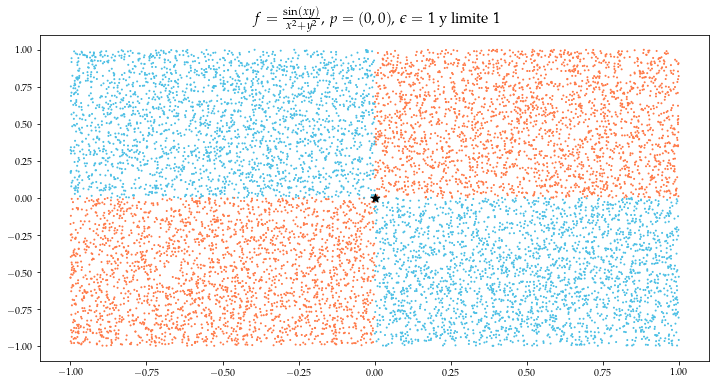

In [24]:
plot_limit(k_, 1, (0,0), 1, str_f='\\frac{\sin(xy)}{x^2 + y^2}', r=1)